Այս նախագծում օգտագործվել է երկրաշարժերի տվյալների dataset,
որը պարունակում է տեղեկություններ երկրաշարժերի ժամանակի,
տեղակայման, խորության և մագնիտուդի մասին։

Նախ իմպորտ անենք այն ծրագրերը և գրադարանները որոնք որ անհրաժեշտ են մեզ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Տվյալների հավաքածուն պարունակում է երկրաշարժերի մասին տեղեկատվություն,
ներառյալ ժամանակը, աշխարհագրական կոորդինատները, խորությունը,
մագնիտուդը և չափման որակը նկարագրող հատկանիշները։

In [3]:
df = pd.read_csv("all_month.csv")
df.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-12-19T01:57:27.313Z,64.225000,-148.088000,5.0000,1.70,ml,22.0,53.0,0.20000,0.70,...,2025-12-19T01:58:47.771Z,"53 km E of Clear, Alaska",earthquake,0.00,NaN,0.40000,4.0,automatic,ak,ak
1,2025-12-19T01:54:52.537Z,31.666000,-104.375000,4.7962,2.50,ml,40.0,95.0,0.00000,0.40,...,2025-12-19T01:59:01.802Z,"56 km S of Whites City, New Mexico",earthquake,0.00,0.974371,0.10000,24.0,automatic,tx,tx
2,2025-12-19T01:52:45.102Z,64.723000,-149.091000,19.5000,1.10,ml,10.0,96.0,0.10000,0.40,...,2025-12-19T01:54:00.749Z,"13 km N of Four Mile Road, Alaska",earthquake,0.00,3.170700,0.10000,4.0,automatic,ak,ak
3,2025-12-19T01:50:12.880Z,33.677333,-116.765667,13.5700,0.97,ml,50.0,40.0,0.05791,0.17,...,2025-12-19T01:53:54.625Z,"8 km SSW of Idyllwild, CA",earthquake,0.17,0.310000,0.15605,26.0,automatic,ci,ci
4,2025-12-19T01:49:36.191Z,60.262000,-152.428000,105.7000,1.80,ml,43.0,59.0,0.20000,0.40,...,2025-12-19T01:51:54.738Z,"48 km WNW of Ninilchik, Alaska",earthquake,0.00,2.200400,0.80000,5.0,automatic,ak,ak


Ահա այստեղ երևում է թե քանի սյուն ունենք, ինչպես նաև ցուցադրված են նրանց non-null արժեքների քանակը, data type-ը

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9639 entries, 0 to 9638
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9639 non-null   object 
 1   latitude         9639 non-null   float64
 2   longitude        9639 non-null   float64
 3   depth            9639 non-null   float64
 4   mag              9638 non-null   float64
 5   magType          9638 non-null   object 
 6   nst              9638 non-null   float64
 7   gap              9636 non-null   float64
 8   dmin             9632 non-null   float64
 9   rms              9638 non-null   float64
 10  net              9639 non-null   object 
 11  id               9639 non-null   object 
 12  updated          9639 non-null   object 
 13  place            9639 non-null   object 
 14  type             9639 non-null   object 
 15  horizontalError  9382 non-null   float64
 16  depthError       9521 non-null   float64
 17  magError      

Այստեղ երևում է նաև dataset-ի չափերը։ Կարելի է նկատել, որ ոչ բոլոր սյուներն ունեն 9639 արժեք

In [5]:
df.shape


(9639, 22)

Ստորև կարելի է նկատել, թե քանի null արժեք ունեն սյուները

In [6]:
df.isnull().sum()


,0
time,0
latitude,0
longitude,0
depth,0
mag,1
magType,1
nst,1
gap,3
dmin,7
rms,1


#Data Cleaning

Անցնենք data-ի մաքրմանը։
Տվյալների մաքրման փուլում ընտրվել են վերլուծության համար
ամենակարևոր հատկանիշները։

Քիչ օգտագործվող կամ մեծ քանակությամբ բացակայող արժեքներ
ունեցող սյունակները հեռացվել են՝ վերլուծությունը պարզեցնելու նպատակով։

In [9]:
important_columns = [
    "time",
    "latitude",
    "longitude",
    "depth",
    "mag",
    "magType",
    "place"
]

df_clean = df[important_columns]


In [10]:
df_clean = df_clean.dropna()


In [11]:
df_clean.isnull().sum()


,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
place,0


## Feature Engineering

Այս փուլում առկա հատկանիշների հիման վրա ստեղծվել են
նոր հատկանիշներ, որոնք թույլ են տալիս
կատարել ժամանակային և սեգմենտացված վերլուծություն
երկրաշարժերի վերաբերյալ։


In [13]:
df_clean["time"] = pd.to_datetime(df_clean["time"])


In [15]:
df_clean["year"] = df_clean["time"].dt.year
df_clean["month"] = df_clean["time"].dt.month
df_clean["day"] = df_clean["time"].dt.day


Ժամանակային նոր հատկանիշների ստեղծումը հնարավորություն է տալիս
ուսումնասիրել երկրաշարժերի հաճախականությունը
տարիների և ամիսների կտրվածքով։

Ստեղծվել է նոր կատեգորիկ հատկանիշ՝
`magnitude_category`, որը խմբավորում է
երկրաշարժերը ըստ նրանց ինտենսիվության։

Սա պարզեցնում է երկրաշարժերի համեմատական
վերլուծությունը և բարելավում արդյունքների
մեկնաբանումը


In [17]:
def magnitude_category(mag):
    if mag < 4:
        return "Low"
    elif mag < 6:
        return "Moderate"
    else:
        return "High"

df_clean["magnitude_category"] = df_clean["mag"].apply(magnitude_category)


Ստուգում են, թե մագնիտուդի տեսակների քանակները dataset-ում

In [19]:
df_clean["magnitude_category"].value_counts()


,count
magnitude_category,
Low,8795
Moderate,837
High,6


In [ ]:
Նաև առանձնացնում ենք նահանգը

In [20]:
df_clean[['place_name', 'state']] = df_clean['place'].str.rsplit(',', n=1, expand=True)
df_clean['place_name'] = df_clean['place_name'].str.strip()
df_clean['state'] = df_clean['state'].str.strip()


In [ ]:
Տարանջատում ենք նաև խորությունները

In [40]:
# Shallow: 0–70 km, Intermediate: 70–300 km, Deep: 300+ km
def categorize_depth(depth):
    if depth <= 70:
        return "Shallow"
    elif depth <= 300:
        return "Intermediate"
    else:
        return "Deep"

df_clean['depth_category'] = df_clean['depth'].apply(categorize_depth)


## Exploratory Data Analysis — Advanced

Այս բաժնում վերլուծում ենք երկրաշարժերի տվյալները
խորացված տեսանկյունից՝ օգտագործելով գրաֆիկներ
և տրվող հատկանիշների փոխկապակցվածություն։


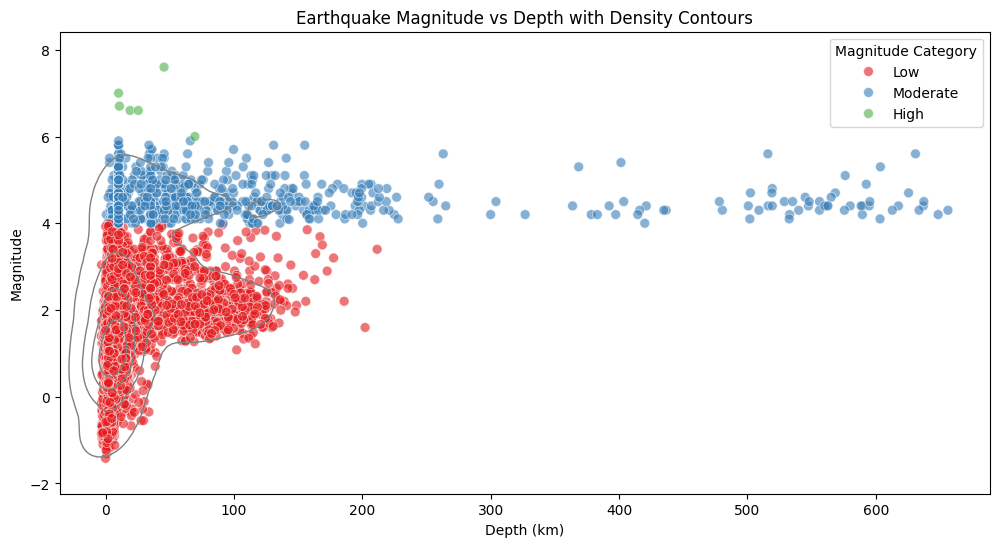

In [38]:
plt.figure(figsize=(12,6))

# Scatter plot
sns.scatterplot(
    x='depth',
    y='mag',
    data=df_clean,
    hue='magnitude_category',
    palette='Set1',
    alpha=0.6,
    s=50
)

# 2D KDE contour for density
sns.kdeplot(
    x=df_clean['depth'],
    y=df_clean['mag'],
    levels=5,    # number of contour levels
    color='gray',
    linewidths=1,
    fill=False
)

plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Earthquake Magnitude vs Depth with Density Contours")
plt.legend(title="Magnitude Category")
plt.show()



## Երկրաշարժերի մագնիտուդ և խորության վերլուծություն

Այս գրաֆիկը ցույց է տալիս երկրաշարժերի մագնիտուդը (y-աղյուսակ) և նրանց խորությունը (x-աղյուսակ):  

- Կետերը ներկայացնում են անհատական երկրաշարժերը, որոնք գունավորվում են ըստ մագնիտուդի կատեգորիաների (`Low`, `Moderate`, `High`):  
- Ներկառուցված 2D կետային խտության կոնտուրները (KDE contours) օգնում են հասկանալ, թե որտեղ են երկրաշարժերը առավել կենտրոնացված և որքան հաճախ են հանդիպում որոշակի խորության և մագնիտուդի համակցություններ:  

Այս տեսակի վիզուալիզացիան թույլ է տալիս ավելի հեշտ դիտարկել երկրաշարժերի տարածվածությունը և ինտենսիվության հարաբերակցությունը խորության հետ, ինչը կարևոր է սեյսմիկ ռիսկերի գնահատման համար։


Հետազոտության արդյունքում պարզվում է, որ երկրաշարժերի մեծ մասը տեղի է ունենում
ափերից որոշակի խորության վրա (shallow earthquakes),
իսկ խորը երկրաշարժերը քիչ են:

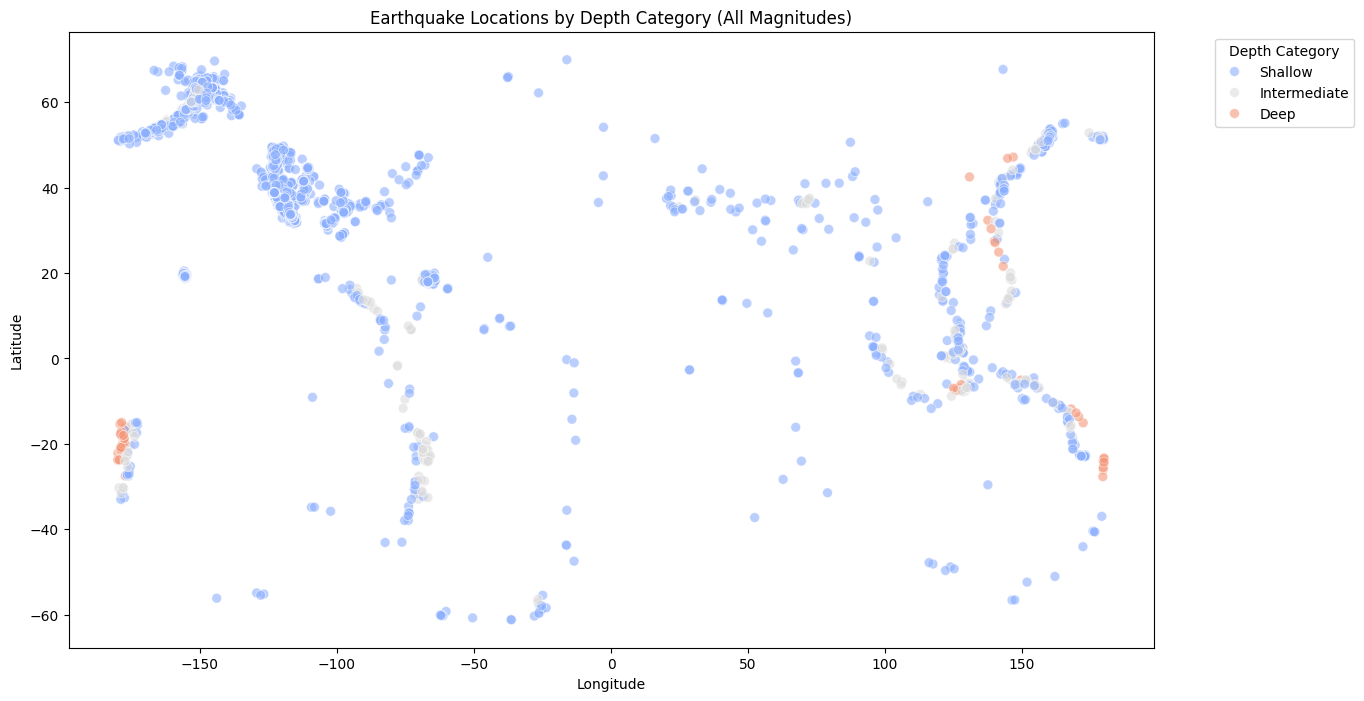

In [50]:
plt.figure(figsize=(14,8))

sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_clean,
    hue='depth_category',
    palette='coolwarm',
    alpha=0.6,
    s=50  # constant size for all points
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Locations by Depth Category (All Magnitudes)")
plt.legend(title="Depth Category", bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


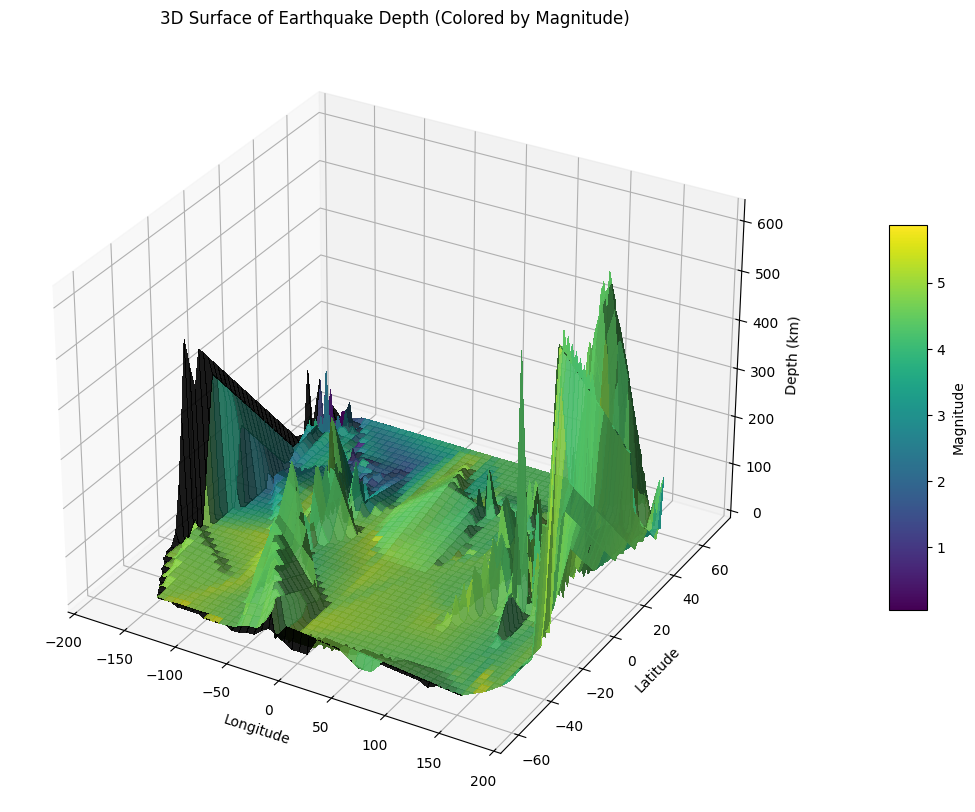

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm
import matplotlib.colors as colors

# Prepare data
lon = df_clean['longitude'].values
lat = df_clean['latitude'].values
depth = df_clean['depth'].values
mag = df_clean['mag'].values

# Create grid
grid_lon, grid_lat = np.meshgrid(
    np.linspace(lon.min(), lon.max(), 100),
    np.linspace(lat.min(), lat.max(), 100)
)

# Interpolate depth and magnitude onto the grid
grid_depth = griddata((lon, lat), depth, (grid_lon, grid_lat), method='linear')
grid_mag = griddata((lon, lat), mag, (grid_lon, grid_lat), method='linear')

# Normalize magnitude for color mapping
norm = colors.Normalize(vmin=np.nanmin(grid_mag), vmax=np.nanmax(grid_mag))
cmap = cm.viridis

# Create 3D plot
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    grid_lon, grid_lat, grid_depth,
    facecolors=cmap(norm(grid_mag)),
    linewidth=0,
    antialiased=False,
    alpha=0.9
)

# Create ScalarMappable for colorbar
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(grid_mag)
cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Magnitude')

# Labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (km)')
ax.set_title('3D Surface of Earthquake Depth (Colored by Magnitude)')

plt.show()


Երկրաշարժերը ըստ նահանգների:
Այս գրաֆիկը ցույց է տալիս երկրաշարժերի բաշխվածությունը ամենաշատ տուժած 10 նահանգներում։ Գրաֆիկը ընդգծում է, որ որոշ նահանգներ, օրինակ՝ Կալիֆորնիան, զգալիորեն ավելի շատ երկրաշարժեր են ունենում, քան մյուսները։ Տարածման տոկոսային նշումները ցույց են տալիս յուրաքանչյուր նահանգի երկրաշարժերի ընդհանուր թիվը։



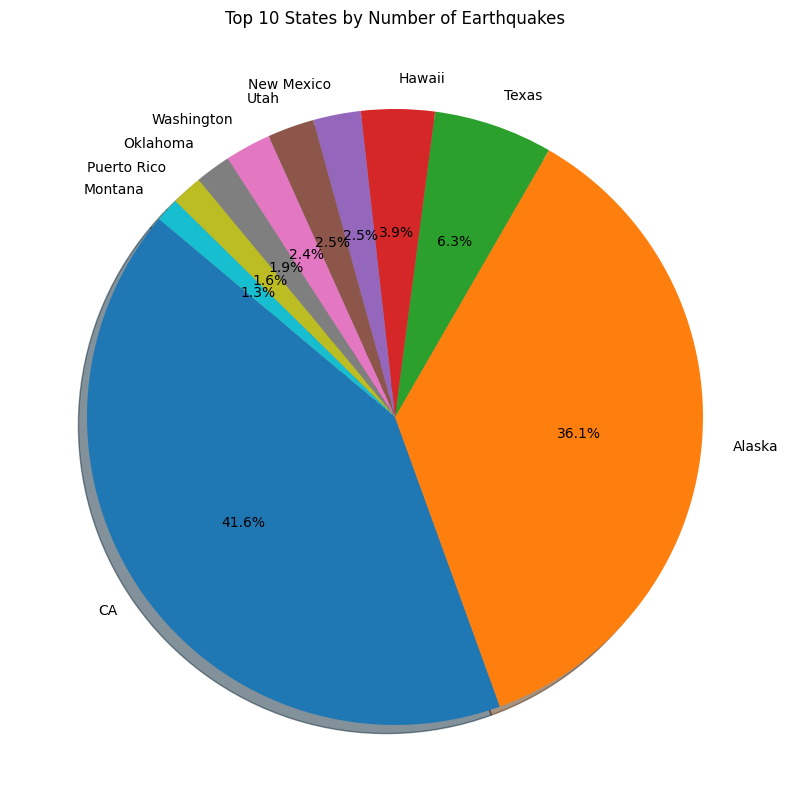

In [48]:
state_counts = df_clean['state'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(
    state_counts.head(10),           # top 10 states
    labels=state_counts.head(10).index,
    autopct='%1.1f%%',               # show percentages
    startangle=140,
    shadow=True
)
plt.title("Top 10 States by Number of Earthquakes")
plt.show()


Երկրաշարժերը ըստ նահանգների: Այս գրաֆիկը ցույց է տալիս երկրաշարժերի բաշխվածությունը ամենաշատ տուժած 10 նահանգներում։ Գրաֆիկը ընդգծում է, որ որոշ նահանգներ, օրինակ՝ Կալիֆորնիան, Ալյակսակն զգալիորեն ավելի շատ երկրաշարժեր են ունենում, քան մյուսները։

In [ ]:
df.head(100)